<a href="https://colab.research.google.com/github/Vrishab20/ML_assignment/blob/main/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CSI5155 - Fall 2024**
#**Assignment 1 – Supervised Learning**

#**CHOCOLATE DATASET**

#**Importing The Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

#**Load The Dataset**

In [ ]:
file_path = '/content/chocolate_dataset.csv'
data = pd.read_csv(file_path)
X = data.iloc[:, :-1]
y = data['Choc'].apply(lambda x: 1 if x == 1 else 0)

#**Train-Test_Split**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

#**Models**

In [ ]:

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(max_iter=1000),
    "k-NN": KNeighborsClassifier()
}


In [ ]:
param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.5],
        'max_depth': [3, 5, 10],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    },
    "MLP": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'alpha': [0.0001, 0.001, 0.01],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    },
    "k-NN": {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}


#**Hyperparameter Tuning**
1. RandomizedSearchCV
2. Predictions
3. Confusion Matric
4. Precision
5. Recall
6. F1 Score
7. ROC-AUC Plot

In [ ]:
def evaluate_models(models, param_grids, std_X_train, std_X_test, y_train, y_test, plot_title=""):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():

        random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=20, cv=5, random_state=42)
        random_search.fit(std_X_train, y_train)


        best_model = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")


        y_pred = best_model.predict(std_X_test)
        y_pred_prob = best_model.predict_proba(std_X_test)[:, 1]


        print(f"\nConfusion Matrix for {model_name}:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f:.2f}")


        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    plt.title(f'ROC Curves for Different Models {plot_title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

#**Handling Class Imbalance**
1. Undersampling
2. Oversampling
3. Combined

In [ ]:

def handle_imbalance(method, std_X_train, y_train):
    if method == "undersample":
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(std_X_train, y_train)
    elif method == "oversample":
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(std_X_train, y_train)
    elif method == "combine":
        smote_enn = SMOTEENN(random_state=42)
        X_res, y_res = smote_enn.fit_resample(std_X_train, y_train)
    return X_res, y_res



--- Original Dataset ---
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'entropy'}

Confusion Matrix for Decision Tree:
[[  0   4]
 [  0 373]]
Precision: 0.99, Recall: 1.00, F1-score: 0.99
Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[  0   4]
 [  0 373]]
Precision: 0.99, Recall: 1.00, F1-score: 0.99
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'C': 100}

Confusion Matrix for SVM:
[[  0   4]
 [  0 373]]
Precision: 0.99, Recall: 1.00, F1-score: 0.99
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.01}

Confusion Matrix for Gradient Boosting:
[[  0   4]
 [  0 373]]
Precision: 0.99, Recall: 1.00, F1-score: 0.99
Best parameters for MLP: {'solver': 'sgd', 'learning_rate': 'co

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'uniform', 'p': 1, 'n_neighbors': 5}

Confusion Matrix for k-NN:
[[  0   4]
 [  0 373]]
Precision: 0.99, Recall: 1.00, F1-score: 0.99


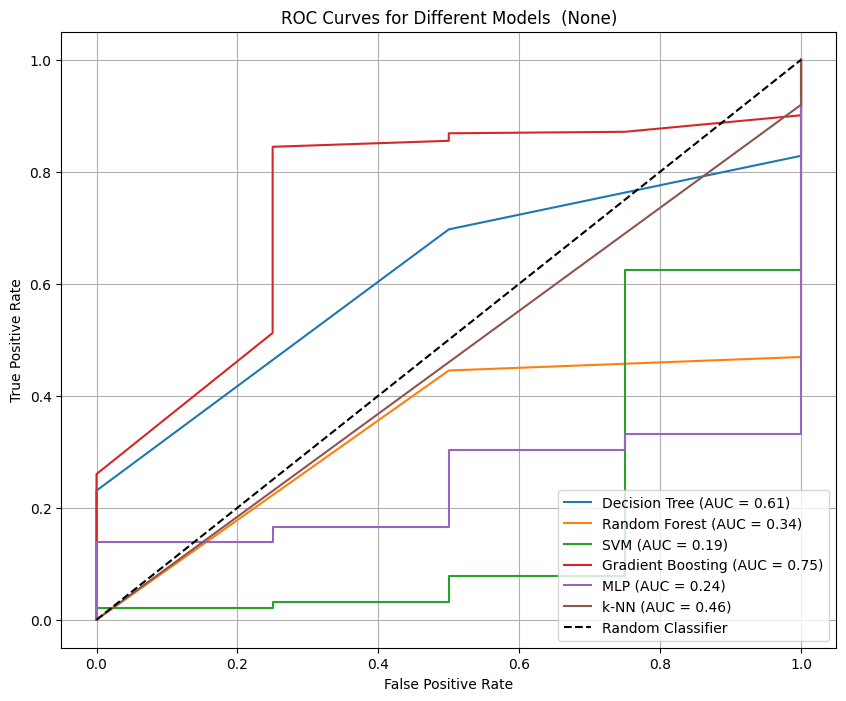


--- Dataset after undersample ---
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}

Confusion Matrix for Decision Tree:
[[  3   1]
 [218 155]]
Precision: 0.99, Recall: 0.42, F1-score: 0.59
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[  1   3]
 [176 197]]
Precision: 0.98, Recall: 0.53, F1-score: 0.69
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 100}

Confusion Matrix for SVM:
[[  2   2]
 [166 207]]
Precision: 0.99, Recall: 0.55, F1-score: 0.71
Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}

Confusion Matrix for Gradient Boosting:
[[  2   2]
 [143 230]]
Precision: 0.99, Recall: 0.62, F1-score: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'tanh'}

Confusion Matrix for MLP:
[[  2   2]
 [185 188]]
Precision: 0.99, Recall: 0.50, F1-score: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'distance', 'p': 2, 'n_neighbors': 3}

Confusion Matrix for k-NN:
[[  1   3]
 [160 213]]
Precision: 0.99, Recall: 0.57, F1-score: 0.72


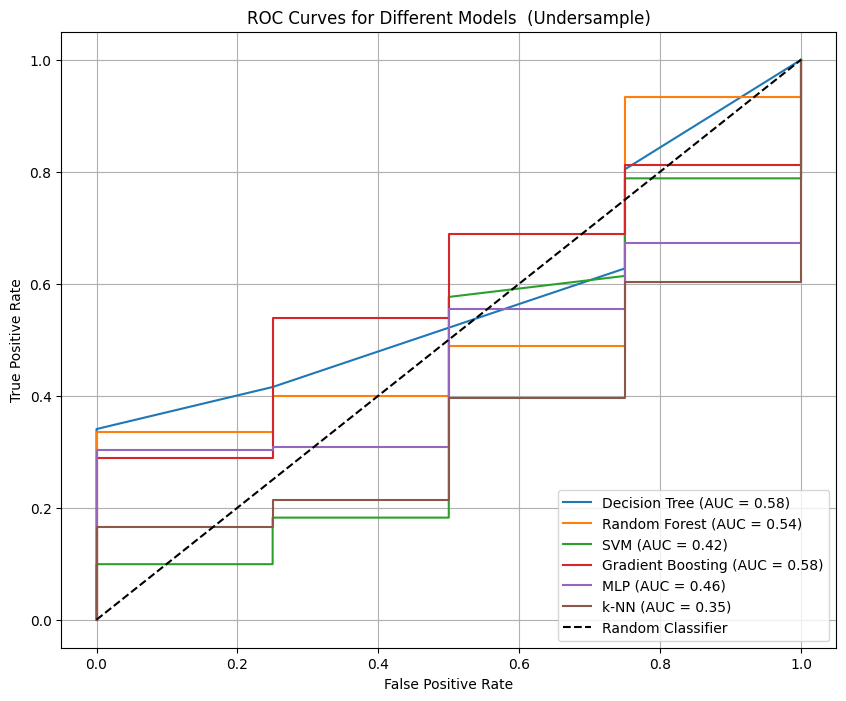


--- Dataset after oversample ---
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Confusion Matrix for Decision Tree:
[[  2   2]
 [151 222]]
Precision: 0.99, Recall: 0.60, F1-score: 0.74
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[  4   0]
 [199 174]]
Precision: 1.00, Recall: 0.47, F1-score: 0.64
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 100}

Confusion Matrix for SVM:
[[  0   4]
 [ 13 360]]
Precision: 0.99, Recall: 0.97, F1-score: 0.98
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10, 'learning_rate': 0.2}

Confusion Matrix for Gradient Boosting:
[[  4   0]
 [318  55]]
Precision: 1.00, Recall: 0.15, F1-score: 0.26


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters for MLP: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}

Confusion Matrix for MLP:
[[  0   4]
 [ 12 361]]
Precision: 0.99, Recall: 0.97, F1-score: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'uniform', 'p': 1, 'n_neighbors': 3}

Confusion Matrix for k-NN:
[[  0   4]
 [ 54 319]]
Precision: 0.99, Recall: 0.86, F1-score: 0.92


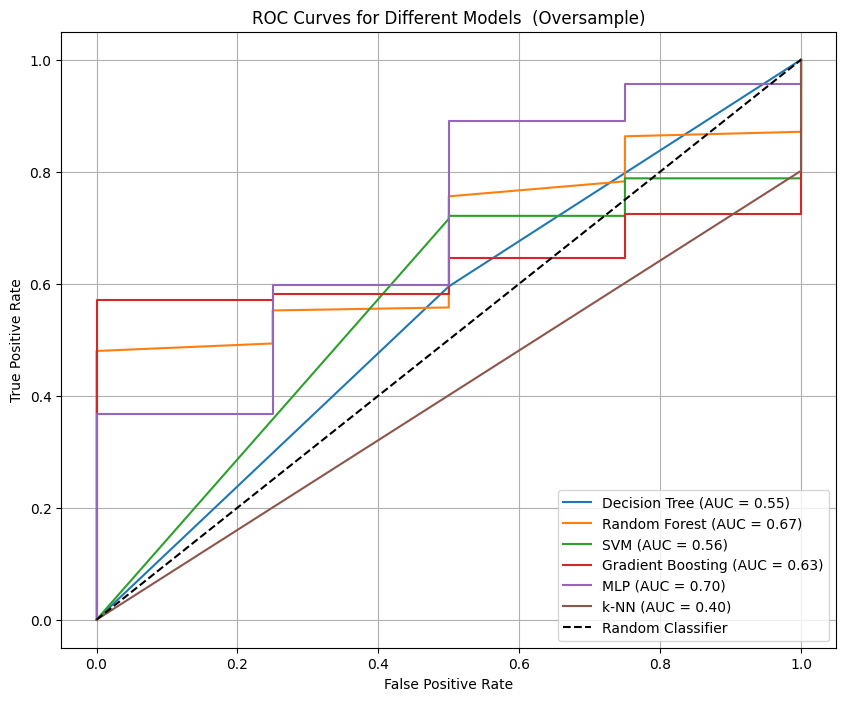


--- Dataset after combine ---
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Confusion Matrix for Decision Tree:
[[  2   2]
 [212 161]]
Precision: 0.99, Recall: 0.43, F1-score: 0.60
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[  2   2]
 [194 179]]
Precision: 0.99, Recall: 0.48, F1-score: 0.65
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 10}

Confusion Matrix for SVM:
[[  0   4]
 [ 32 341]]
Precision: 0.99, Recall: 0.91, F1-score: 0.95
Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.5}

Confusion Matrix for Gradient Boosting:
[[  4   0]
 [330  43]]
Precision: 1.00, Recall: 0.12, F1-score: 0.21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters for MLP: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'relu'}

Confusion Matrix for MLP:
[[  0   4]
 [ 31 342]]
Precision: 0.99, Recall: 0.92, F1-score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'uniform', 'p': 2, 'n_neighbors': 3}

Confusion Matrix for k-NN:
[[  0   4]
 [ 78 295]]
Precision: 0.99, Recall: 0.79, F1-score: 0.88


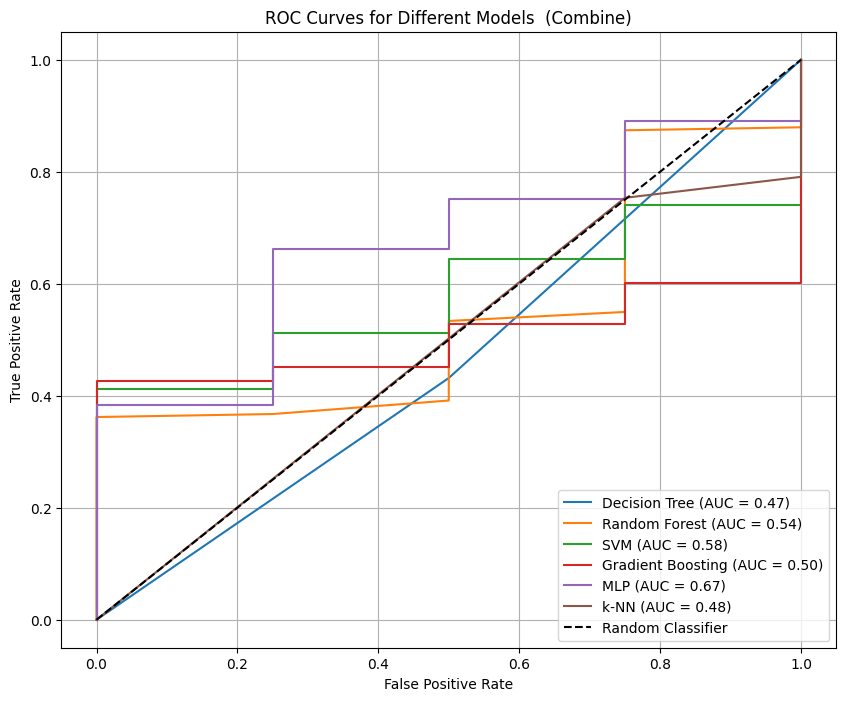

In [ ]:

methods = ["None", "undersample", "oversample", "combine"]
for method in methods:
    if method == "None":
        print("\n--- Original Dataset ---")
        X_res, y_res = std_X_train, y_train
    else:
        print(f"\n--- Dataset after {method} ---")
        X_res, y_res = handle_imbalance(method, std_X_train, y_train)
        X_res = scaler.fit_transform(X_res)

    evaluate_models(models, param_grids, X_res, std_X_test, y_res, y_test, plot_title=f" ({method.capitalize()})")

#Original Dataset CM

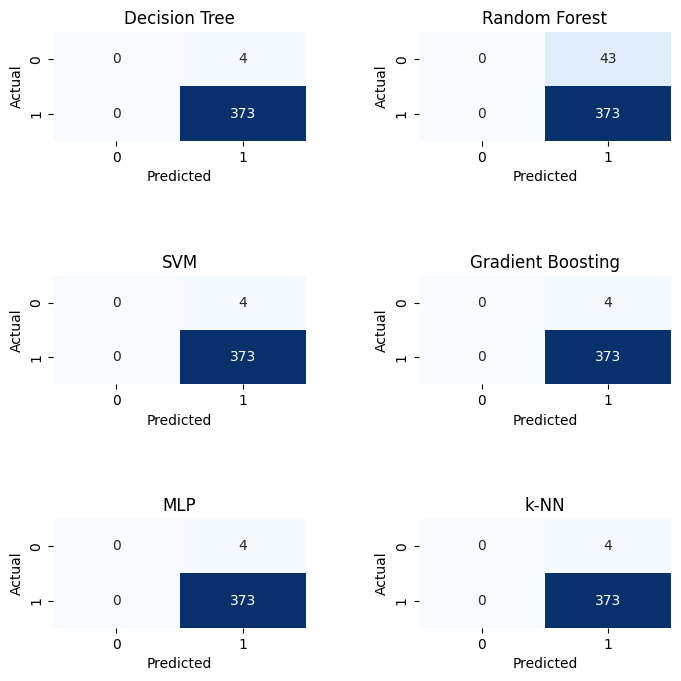

In [11]:
import seaborn as sns
cm_data = {
    "Decision Tree": np.array([[0 , 4], [ 0 ,373]]),
    "Random Forest": np.array([[0  , 43], [0 ,373]]),
    "SVM": np.array([[0  , 4], [0 ,373]]),
    "Gradient Boosting": np.array([[0  , 4], [0 ,373]]),
    "MLP": np.array([[0  , 4], [0 ,373]]),
    "k-NN": np.array([[0  , 4], [0 ,373]])
}

fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()

#Undersampled Dataset CM

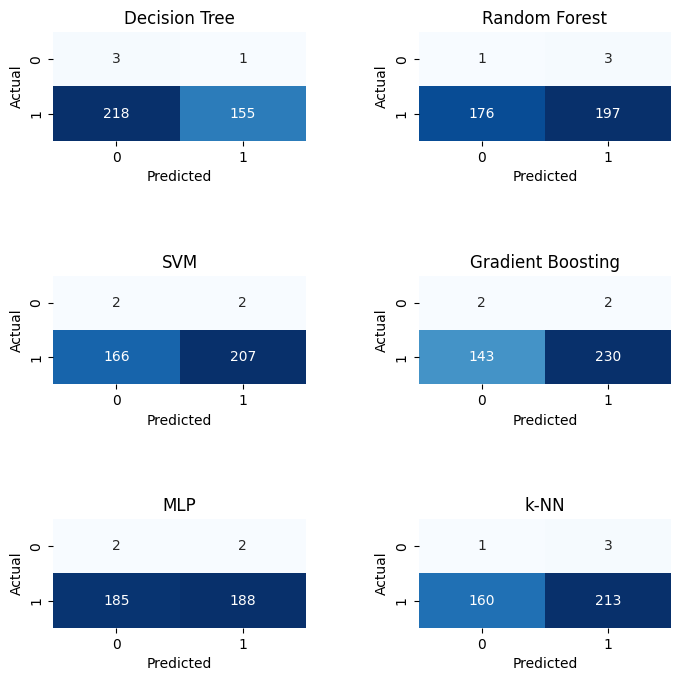

In [15]:
cm_data = {
    "Decision Tree": np.array([[3, 1], [218, 155]]),
    "Random Forest": np.array([[1, 3], [176, 197]]),
    "SVM": np.array([[2, 2], [166, 207]]),
    "Gradient Boosting": np.array([[2, 2], [143, 230]]),
    "MLP": np.array([[2, 2], [185, 188]]),
    "k-NN": np.array([[1, 3], [160, 213]])
}
fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()


#Oversampled Dataset CM

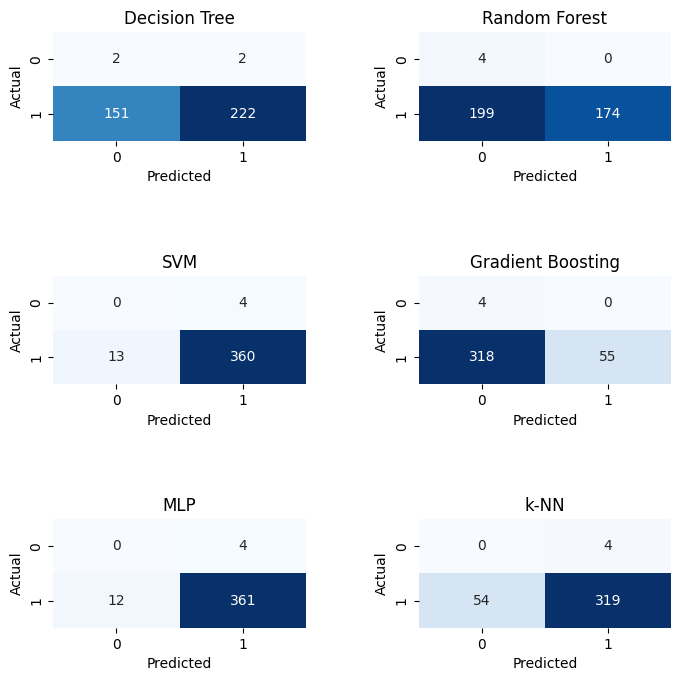

In [10]:
cm_data = {
    "Decision Tree": np.array([[2  , 2], [151, 222]]),
    "Random Forest": np.array([[4, 0], [199,174]]),
    "SVM": np.array([[0,4], [13,360]]),
    "Gradient Boosting": np.array([[4,0], [318,55]]),
    "MLP": np.array([[0,4], [12,361]]),
    "k-NN": np.array([[0,4], [54,319]])
}
fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()

#Combined Dataset CM

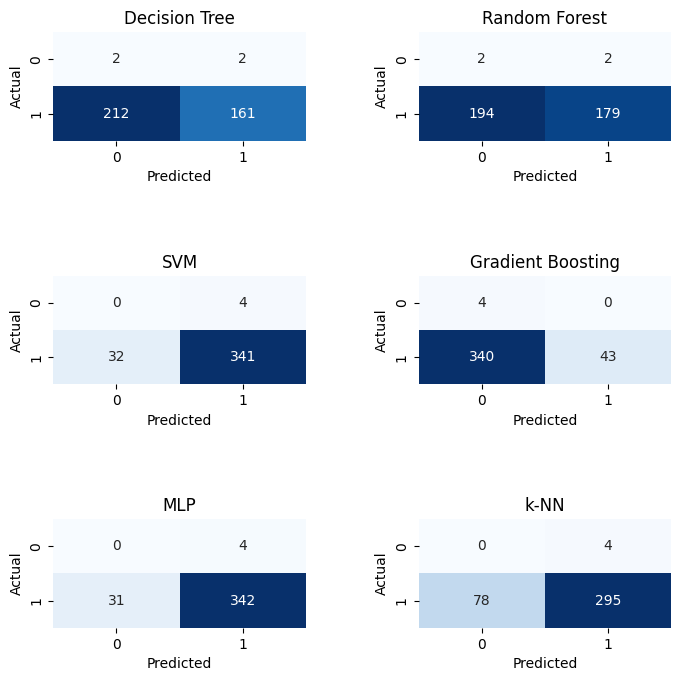

In [13]:
cm_data = {
    "Decision Tree": np.array([[2  , 2], [212,161]]),
    "Random Forest": np.array([[2,2], [194,179]]),
    "SVM": np.array([[0,4], [32,341]]),
    "Gradient Boosting": np.array([[4,0], [340,43]]),
    "MLP": np.array([[0,4], [31, 342]]),
    "k-NN": np.array([[0,4], [78,295]])
}
fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()

#**MAGIC MUSHROOMS DATASET**

#**Importing The Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

#**Load The Dataset**

In [ ]:
file_path = '/content/mushroom_dataset.csv'
data = pd.read_csv(file_path)
X = data.iloc[:, :-1]
y = data['Mushroom'].apply(lambda x: 1 if x == 1 else 0)

#**Train-Test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

#**Models**

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(max_iter=1000),
    "k-NN": KNeighborsClassifier()
}

#**Hyperparameter Tuning**
1. RandomizedSearchCV
2. Predictions
3. Confusion Matric
4. Precision
5. Recall
6. F1 Score
7. ROC-AUC Plot

In [ ]:
param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2, 0.5],
        'max_depth': [3, 5, 10],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    },
    "MLP": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'alpha': [0.0001, 0.001, 0.01],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    },
    "k-NN": {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}


In [ ]:
def evaluate_models(models, param_grids, std_X_train, std_X_test, y_train, y_test, plot_title=""):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():

        random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=20, cv=5, random_state=42)
        random_search.fit(std_X_train, y_train)


        best_model = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")


        y_pred = best_model.predict(std_X_test)
        y_pred_prob = best_model.predict_proba(std_X_test)[:, 1]


        print(f"\nConfusion Matrix for {model_name}:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f:.2f}")


        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    plt.title(f'ROC Curves for Different Models {plot_title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

#**Handling Class Imbalance**
1. Undersampling
2. Oversampling
3. Combined

In [ ]:

def handle_imbalance(method, std_X_train, y_train):
    if method == "undersample":
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(std_X_train, y_train)
    elif method == "oversample":
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(std_X_train, y_train)
    elif method == "combine":
        smote_enn = SMOTEENN(random_state=42)
        X_res, y_res = smote_enn.fit_resample(std_X_train, y_train)
    return X_res, y_res


--- Original Dataset ---
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}

Confusion Matrix for Decision Tree:
[[187  46]
 [ 40 104]]
Precision: 0.69, Recall: 0.72, F1-score: 0.71
Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[192  41]
 [ 53  91]]
Precision: 0.69, Recall: 0.63, F1-score: 0.66
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 0.1}

Confusion Matrix for SVM:
[[191  42]
 [ 46  98]]
Precision: 0.70, Recall: 0.68, F1-score: 0.69
Best parameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.01}

Confusion Matrix for Gradient Boosting:
[[194  39]
 [ 52  92]]
Precision: 0.70, Recall: 0.64, F1-score: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters for MLP: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}

Confusion Matrix for MLP:
[[194  39]
 [ 51  93]]
Precision: 0.70, Recall: 0.65, F1-score: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'uniform', 'p': 1, 'n_neighbors': 10}

Confusion Matrix for k-NN:
[[193  40]
 [ 63  81]]
Precision: 0.67, Recall: 0.56, F1-score: 0.61


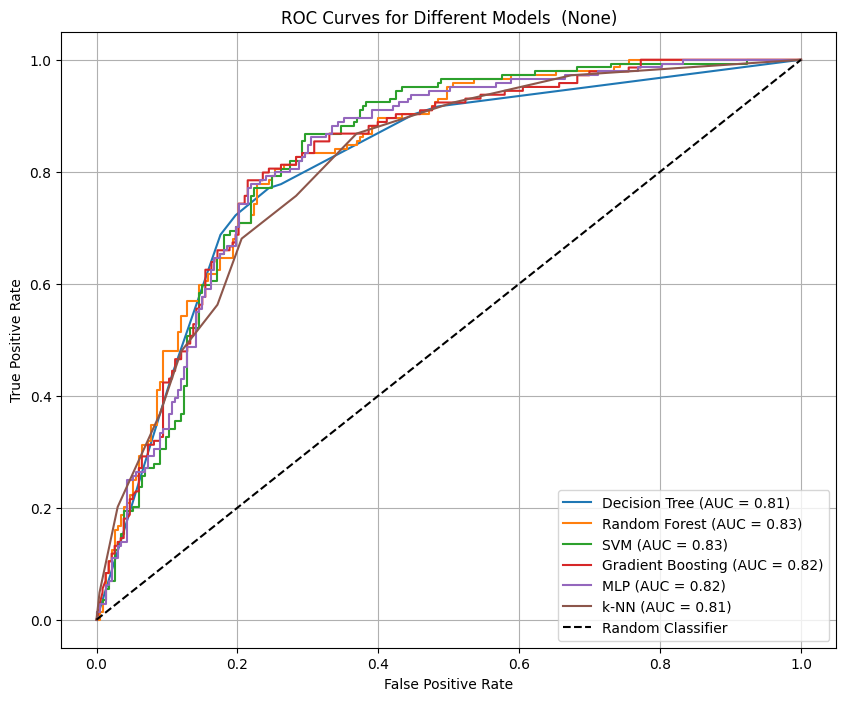


--- Dataset after undersample ---
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}

Confusion Matrix for Decision Tree:
[[156  77]
 [ 29 115]]
Precision: 0.60, Recall: 0.80, F1-score: 0.68
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}

Confusion Matrix for Random Forest:
[[166  67]
 [ 30 114]]
Precision: 0.63, Recall: 0.79, F1-score: 0.70
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1}

Confusion Matrix for SVM:
[[160  73]
 [ 31 113]]
Precision: 0.61, Recall: 0.78, F1-score: 0.68
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}

Confusion Matrix for Gradient Boosting:
[[166  67]
 [ 34 110]]
Precision: 0.62, Recall: 0.76, F1-score: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters for MLP: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'relu'}

Confusion Matrix for MLP:
[[164  69]
 [ 22 122]]
Precision: 0.64, Recall: 0.85, F1-score: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'uniform', 'p': 2, 'n_neighbors': 20}

Confusion Matrix for k-NN:
[[163  70]
 [ 27 117]]
Precision: 0.63, Recall: 0.81, F1-score: 0.71


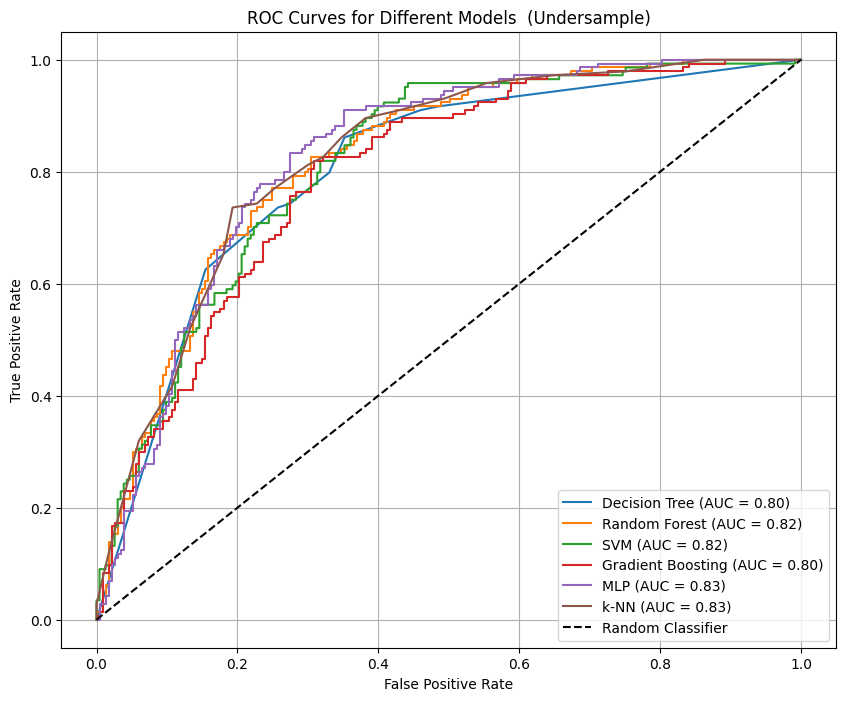


--- Dataset after oversample ---
Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}

Confusion Matrix for Decision Tree:
[[ 80 153]
 [  8 136]]
Precision: 0.47, Recall: 0.94, F1-score: 0.63
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[132 101]
 [ 25 119]]
Precision: 0.54, Recall: 0.83, F1-score: 0.65
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 100}

Confusion Matrix for SVM:
[[170  63]
 [ 54  90]]
Precision: 0.59, Recall: 0.62, F1-score: 0.61
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10, 'learning_rate': 0.2}

Confusion Matrix for Gradient Boosting:
[[112 121]
 [ 18 126]]
Precision: 0.51, Recall: 0.88, F1-score: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters for MLP: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'tanh'}

Confusion Matrix for MLP:
[[166  67]
 [ 43 101]]
Precision: 0.60, Recall: 0.70, F1-score: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'distance', 'p': 1, 'n_neighbors': 5}

Confusion Matrix for k-NN:
[[151  82]
 [ 33 111]]
Precision: 0.58, Recall: 0.77, F1-score: 0.66


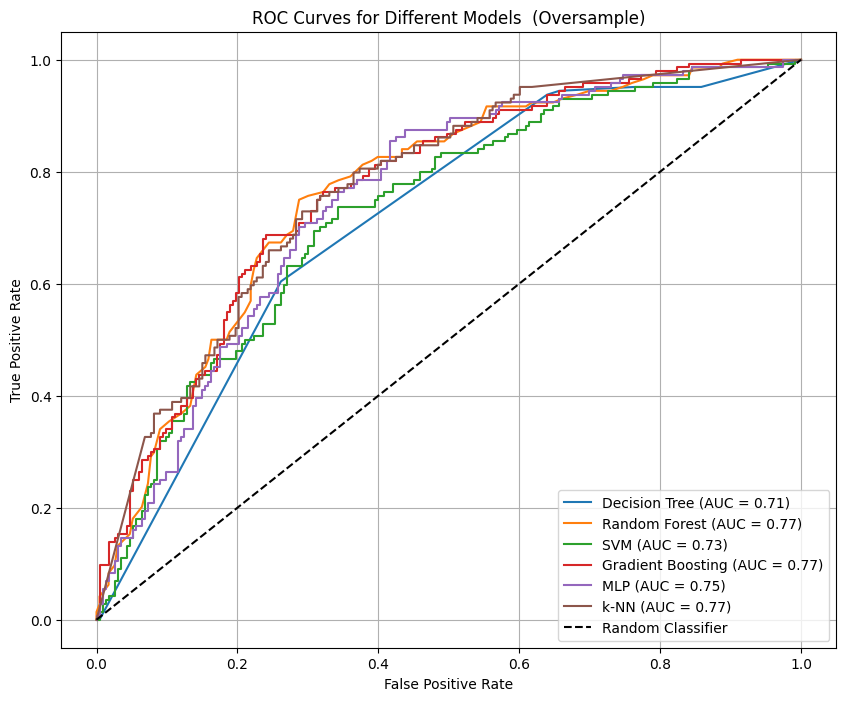


--- Dataset after combine ---
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Confusion Matrix for Decision Tree:
[[ 82 151]
 [ 10 134]]
Precision: 0.47, Recall: 0.93, F1-score: 0.62
Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}

Confusion Matrix for Random Forest:
[[135  98]
 [ 11 133]]
Precision: 0.58, Recall: 0.92, F1-score: 0.71
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1}

Confusion Matrix for SVM:
[[153  80]
 [ 21 123]]
Precision: 0.61, Recall: 0.85, F1-score: 0.71
Best parameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.2}

Confusion Matrix for Gradient Boosting:
[[118 115]
 [  9 135]]
Precision: 0.54, Recall: 0.94, F1-score: 0.69
Best parameters for MLP: {'solver': 'adam', 'learning_rate':

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for k-NN: {'weights': 'uniform', 'p': 1, 'n_neighbors': 3}

Confusion Matrix for k-NN:
[[154  79]
 [ 22 122]]
Precision: 0.61, Recall: 0.85, F1-score: 0.71


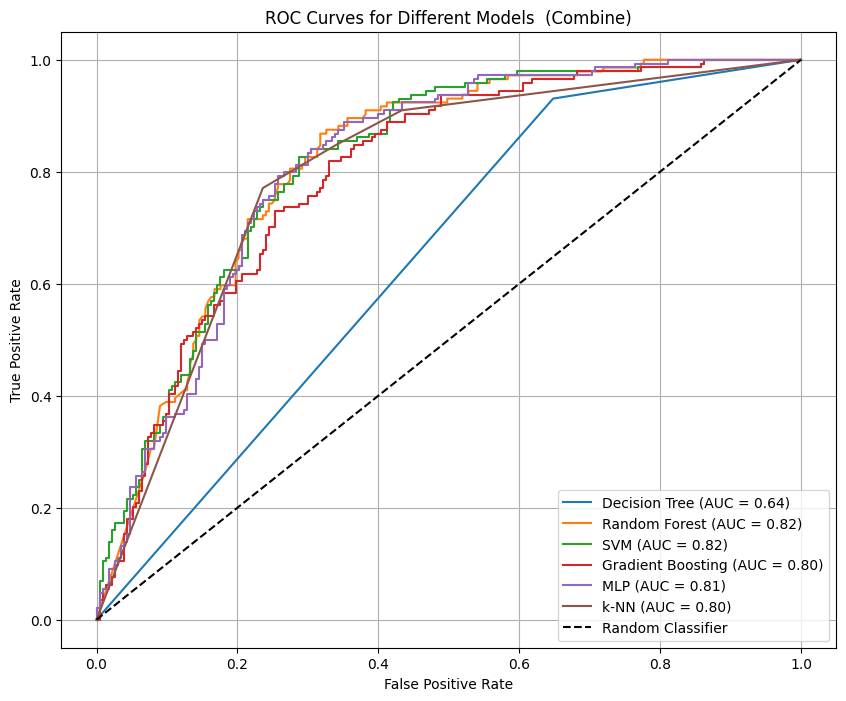

In [ ]:

methods = ["None", "undersample", "oversample", "combine"]

for method in methods:
    if method == "None":
        print("\n--- Original Dataset ---")
        X_res, y_res = std_X_train, y_train
    else:
        print(f"\n--- Dataset after {method} ---")
        X_res, y_res = handle_imbalance(method, std_X_train, y_train)
        X_res = scaler.fit_transform(X_res)

    evaluate_models(models, param_grids, X_res, std_X_test, y_res, y_test, plot_title=f" ({method.capitalize()})")

#Original Dataset CM

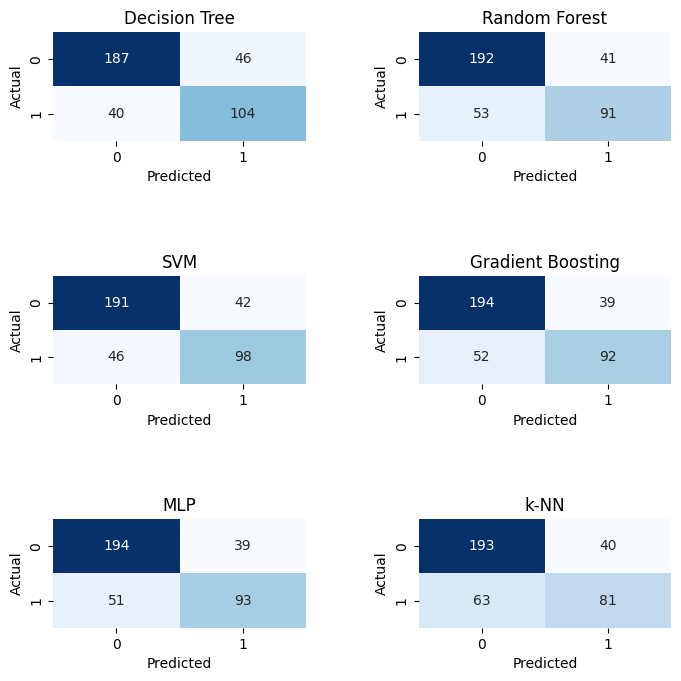

In [18]:
cm_data = {
    'Decision Tree': np.array([[187, 46], [40, 104]]),
    'Random Forest': np.array([[192, 41], [53, 91]]),
    'SVM': np.array([[191, 42], [46, 98]]),
    'Gradient Boosting': np.array([[194, 39], [52, 92]]),
    'MLP': np.array([[194, 39], [51, 93]]),
    'k-NN': np.array([[193, 40], [63, 81]])
}
fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()

#Undersampled Dataset CM

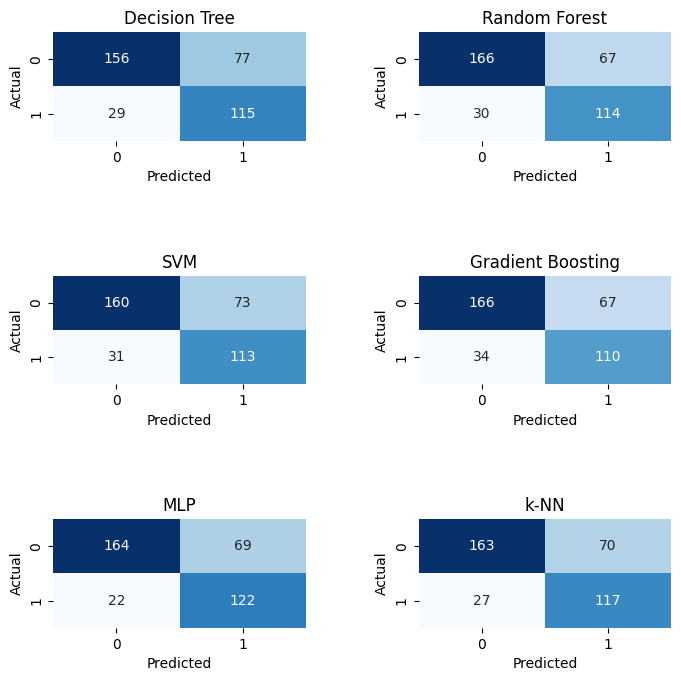

In [19]:
cm_data = {
    'Decision Tree': np.array([[156, 77], [29, 115]]),
    'Random Forest': np.array([[166, 67], [30, 114]]),
    'SVM': np.array([[160, 73], [31, 113]]),
    'Gradient Boosting': np.array([[166, 67], [34, 110]]),
    'MLP': np.array([[164, 69], [22, 122]]),
    'k-NN': np.array([[163, 70], [27, 117]])
}
fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)  # Separate the plots with padding
plt.show()

#Oversampled Dataset CM

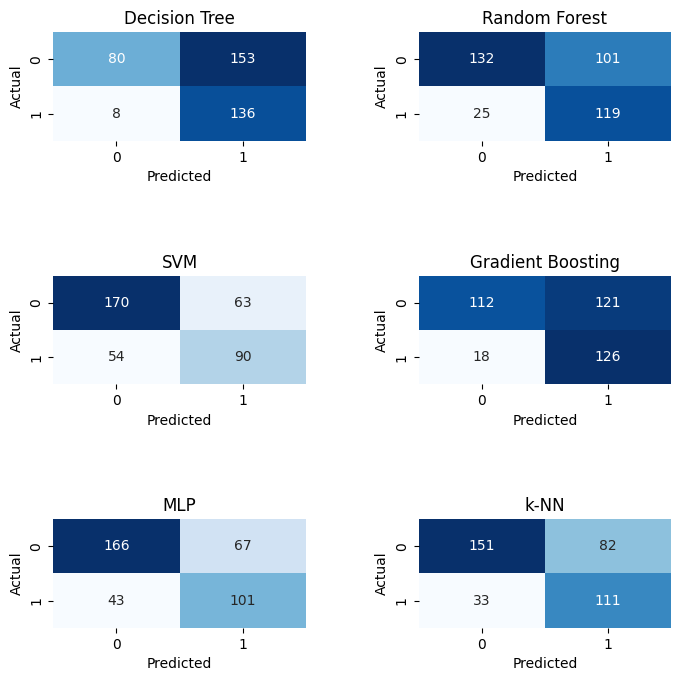

In [20]:
cm_data = {
    'Decision Tree': np.array([[80, 153], [8, 136]]),
    'Random Forest': np.array([[132, 101], [25, 119]]),
    'SVM': np.array([[170, 63], [54, 90]]),
    'Gradient Boosting': np.array([[112, 121], [18, 126]]),
    'MLP': np.array([[166, 67], [43, 101]]),
    'k-NN': np.array([[151, 82], [33, 111]])
}

fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()

#Combined Dataset CM

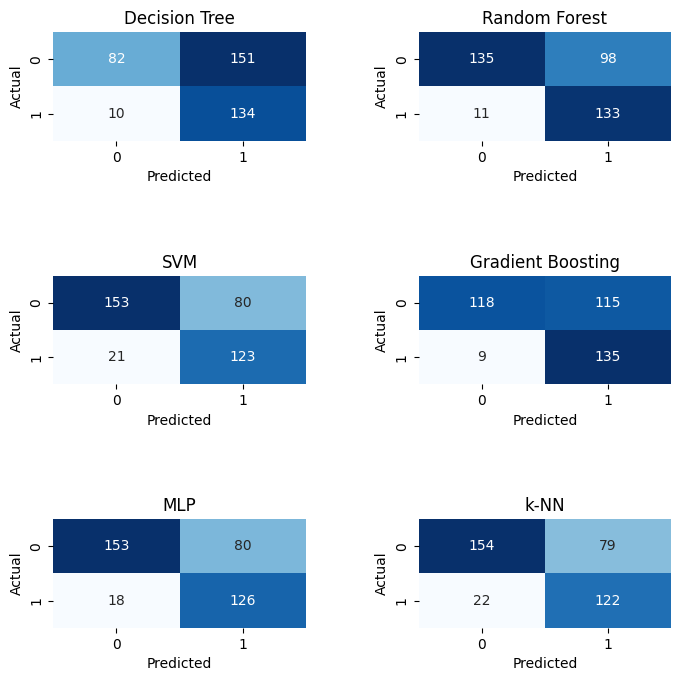

In [21]:
cm_data = {
    'Decision Tree': np.array([[82, 151], [10, 134]]),
    'Random Forest': np.array([[135, 98], [11, 133]]),
    'SVM': np.array([[153, 80], [21, 123]]),
    'Gradient Boosting': np.array([[118, 115], [9, 135]]),
    'MLP': np.array([[153, 80], [18, 126]]),
    'k-NN': np.array([[154, 79], [22, 122]])
}
fig, axes = plt.subplots(3, 2, figsize=(8,8))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, cm_data.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(pad=5)
plt.show()